In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

pd.set_option('display.max_columns', None)

In [3]:
X = data.data
y = data.target

In [4]:
X = pd.DataFrame(X, columns=data.feature_names)

In [5]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
y = pd.DataFrame(y, columns=['Cancer'])

In [8]:
type_of_breast_cancer = {0 :'malignant', 1:'benign'}
y['type_of_breast_cancer'] = y['Cancer'].map(type_of_breast_cancer)

In [9]:
y.head()

,Cancer,type_of_breast_cancer
0,0,malignant
1,0,malignant
2,0,malignant
3,0,malignant
4,0,malignant


In [10]:
X.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [11]:
X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [12]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
X.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

In [14]:
from sklearn.preprocessing import PowerTransformer
for col in X.columns:
    if X[col].skew() > 1:
        sqrt = np.sqrt(X[col])
        log = np.log(X[col])
        log1p = np.log1p(X[col])
        pw_tr = pd.Series(PowerTransformer(method='yeo-johnson').fit_transform(X[col].values.reshape(-1,1)).flatten())
        print(f'{col} skewness using sqrt: {sqrt.skew()}')
        print(f'{col} skewness using log: {log.skew()}')
        print(f'{col} skewness using log1p: {log1p.skew()}')
        print(f'{col} skewness using power_transformer: {pw_tr.skew()}')

mean area skewness using sqrt: 0.9338392911016027
mean area skewness using log: 0.2849574596767259
mean area skewness using log1p: 0.2873275616161656
mean area skewness using power_transformer: 0.005204050820177483
mean compactness skewness using sqrt: 0.5647930936224743
mean compactness skewness using log: -0.03408599328166632
mean compactness skewness using log1p: 1.0431948992217857
mean compactness skewness using power_transformer: 0.10556418304391042
mean concavity skewness using sqrt: 0.3600156986708073
mean concavity skewness using log: nan
mean concavity skewness using log1p: 1.206982161984789
mean concavity skewness using power_transformer: 0.22392397296992653
mean concave points skewness using sqrt: 0.24378928733403893
mean concave points skewness using log: nan
mean concave points skewness using log1p: 1.0831801862884638
mean concave points skewness using power_transformer: 0.1987400509278245
mean fractal dimension skewness using sqrt: 1.0680646082261143
mean fractal dimensio

In [15]:
cancer_class = y.drop(columns=['type_of_breast_cancer'])
y = y.drop(columns=['type_of_breast_cancer'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398, 1), (171, 1))

In [18]:
pw_tr = PowerTransformer(method='yeo-johnson')
X_train_transformed = pw_tr.fit_transform(X_train)
X_test_transformed = pw_tr.transform(X_test)

In [19]:
lg_model_unbal = LogisticRegression(max_iter=2000, n_jobs=1, random_state=42)

In [20]:
lg_model_bal = LogisticRegression(max_iter=2000, n_jobs=1, random_state=42, class_weight='balanced')

In [21]:
lg_model_unbal.fit(X_train_transformed, y_train.values.ravel())
lg_model_bal.fit(X_train_transformed, y_train.values.ravel())

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [22]:
y_test_proba_unbal = lg_model_unbal.predict_proba(X_test_transformed)[:, 1]
y_test_proba_bal = lg_model_bal.predict_proba(X_test_transformed)[:, 1]

In [23]:
print(f'roc_auc score for unbalanced model: {roc_auc_score(y_test, y_test_proba_unbal)}')
print(f'roc_auc score for balanced model: {roc_auc_score(y_test, y_test_proba_bal)}')

roc_auc score for unbalanced model: 0.9988242210464433
roc_auc score for balanced model: 0.9986772486772487


In [24]:
print(f'pr_auc score for unbalanced model: {average_precision_score(y_test, y_test_proba_unbal)}')
print(f'pr_auc score for balanced model: {average_precision_score(y_test, y_test_proba_bal)}')

pr_auc score for unbalanced model: 0.9992975446165331
pr_auc score for balanced model: 0.9992141417808367


In [25]:
y_test_pred_unbal = (y_test_proba_unbal >= 0.5).astype(int)
y_test_pred_bal = (y_test_proba_bal >= 0.5).astype(int)

In [26]:
print(f'classification report for unbalanced model:\n {classification_report(y_test, y_test_pred_unbal)}')
print(f'classification_report for balanced model:\n {classification_report(y_test, y_test_pred_bal)}')

classification report for unbalanced model:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

classification_report for balanced model:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        63
           1       0.99      0.97      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [27]:
print(f'confusion_matrix for unbalanced model:\n {confusion_matrix(y_test, y_test_pred_unbal)}')
print(f'confusion_matrix for balanced model:\n {confusion_matrix(y_test, y_test_pred_bal)}')

confusion_matrix for unbalanced model:
 [[ 62   1]
 [  2 106]]
confusion_matrix for balanced model:
 [[ 62   1]
 [  3 105]]


In [28]:
rf_bal = RandomForestClassifier(n_estimators=1500, class_weight='balanced', random_state=42, n_jobs=1)
rf_unbal = RandomForestClassifier(n_estimators=1500, random_state=42, n_jobs=1)

In [29]:
rf_unbal.fit(X_train_transformed, y_train.values.ravel())
rf_bal.fit(X_train_transformed, y_train.values.ravel())

,n_estimators,1500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
y_test_proba_unbal_rf = rf_unbal.predict_proba(X_test_transformed)[:, 1]
y_test_proba_bal_rf = rf_bal.predict_proba(X_test_transformed)[:, 1]

In [31]:
print(f'roc_auc score for unbalanced model: {roc_auc_score(y_test, y_test_proba_unbal_rf)}')
print(f'roc_auc score for balanced model: {roc_auc_score(y_test, y_test_proba_bal_rf)}')

roc_auc score for unbalanced model: 0.9966196355085244
roc_auc score for balanced model: 0.9982363315696648


In [32]:
y_test_pred_unbal_rf = (y_test_proba_unbal_rf >= 0.5).astype(int)
y_test_pred_bal_rf = (y_test_proba_bal_rf >= 0.5).astype(int)

In [33]:
print(f'classification report for unbalanced model:\n {classification_report(y_test, y_test_pred_unbal_rf)}')
print(f'classification_report for balanced model:\n {classification_report(y_test, y_test_pred_bal_rf)}')

classification report for unbalanced model:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

classification_report for balanced model:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [34]:
print(f'confusion_matrix for unbalanced model:\n {confusion_matrix(y_test, y_test_pred_unbal)}')
print(f'confusion_matrix for balanced model:\n {confusion_matrix(y_test, y_test_pred_bal)}')

confusion_matrix for unbalanced model:
 [[ 62   1]
 [  2 106]]
confusion_matrix for balanced model:
 [[ 62   1]
 [  3 105]]


In [35]:
from sklearn.model_selection import cross_val_predict
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
predict_proba_cv_unbal = cross_val_predict(rf_unbal, X, y.values.ravel(), cv=skf, n_jobs=1, method='predict_proba')[:, 1]
predict_proba_cv_bal = cross_val_predict(rf_bal, X, y.values.ravel(), cv=skf, n_jobs=1, method='predict_proba')[:, 1]

In [36]:
print(f'roc_auc score for unbalanced model: {roc_auc_score(y, predict_proba_cv_unbal)}')
print(f'roc_auc score for balanced model: {roc_auc_score(y, predict_proba_cv_bal)}')

roc_auc score for unbalanced model: 0.9898129062945933
roc_auc score for balanced model: 0.9902885682574917


In [37]:
print(f'pr_auc score for unbalanced model: {average_precision_score(y, predict_proba_cv_unbal)}')
print(f'pr_auc score for balanced model: {average_precision_score(y, predict_proba_cv_bal)}')

pr_auc score for unbalanced model: 0.9926172719761635
pr_auc score for balanced model: 0.9929720996049041


In [38]:
pred_cv_unbal = (predict_proba_cv_unbal >= 0.5).astype(int)
pred_cv_bal = (predict_proba_cv_bal >= 0.5).astype(int)

In [39]:
print(f'classification report for unbalanced model:\n {classification_report(y, pred_cv_unbal)}')
print(f'classification_report for balanced model:\n {classification_report(y, pred_cv_bal)}')

classification report for unbalanced model:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       212
           1       0.96      0.97      0.96       357

    accuracy                           0.95       569
   macro avg       0.95      0.95      0.95       569
weighted avg       0.95      0.95      0.95       569

classification_report for balanced model:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       212
           1       0.97      0.97      0.97       357

    accuracy                           0.96       569
   macro avg       0.96      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



In [40]:
print(f'confusion matrix for unbalanced model:\n {confusion_matrix(y, pred_cv_unbal)}')
print(f'confusion matrix for balanced model:\n {confusion_matrix(y, pred_cv_bal)}')

confusion matrix for unbalanced model:
 [[196  16]
 [ 11 346]]
confusion matrix for balanced model:
 [[200  12]
 [  9 348]]


In [41]:
dt_tree_bal = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_tree_unbal = DecisionTreeClassifier(random_state=42)

proba_tree_unbal = cross_val_predict(dt_tree_unbal, X, y.values.ravel(), cv=skf, n_jobs=1, method='predict_proba')[:, 1]
proba_tree_bal = cross_val_predict(dt_tree_bal, X, y.values.ravel(), cv=skf, n_jobs=1, method='predict_proba')[:, 1]

In [42]:
print(f'roc_auc score for unbalanced model: {roc_auc_score(y, proba_tree_unbal)}')
print(f'roc_auc score for balanced model: {roc_auc_score(y, proba_tree_bal)}')

print(f'pr_auc score for unbalanced model: {average_precision_score(y, proba_tree_unbal)}')
print(f'pr_auc score for balanced model: {average_precision_score(y, proba_tree_bal)}')

roc_auc score for unbalanced model: 0.8998335183129856
roc_auc score for balanced model: 0.9210599334073252
pr_auc score for unbalanced model: 0.90093771237499
pr_auc score for balanced model: 0.9227200029189802


In [43]:
pred_tree_unbal = (proba_tree_unbal >= 0.5).astype(int)
pred_tree_bal = (proba_tree_bal >= 0.5).astype(int)

In [44]:
print(f'classification report for unbalanced model:\n {classification_report(y, pred_tree_unbal)}')
print(f'classification_report for balanced model:\n {classification_report(y, pred_tree_bal)}')

classification report for unbalanced model:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       212
           1       0.92      0.94      0.93       357

    accuracy                           0.91       569
   macro avg       0.91      0.90      0.90       569
weighted avg       0.91      0.91      0.91       569

classification_report for balanced model:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       212
           1       0.94      0.94      0.94       357

    accuracy                           0.93       569
   macro avg       0.92      0.92      0.92       569
weighted avg       0.93      0.93      0.93       569



In [45]:
print(f'confusion_matrix for unbalanced model:\n {confusion_matrix(y, pred_tree_unbal)}')
print(f'confusion_matrix for balanced model:\n {confusion_matrix(y, pred_tree_bal)}')

confusion_matrix for unbalanced model:
 [[182  30]
 [ 21 336]]
confusion_matrix for balanced model:
 [[191  21]
 [ 21 336]]


In [46]:
import joblib
joblib.dump(rf_bal, 'C:/Users/aksha/breast_cancer_project/breast_cancer_model_v1.joblib')

['C:/Users/aksha/breast_cancer_project/breast_cancer_model_v1.joblib']

In [47]:
prob_lg_cv_unbal = cross_val_predict(lg_model_unbal, X, y.values.ravel(), cv=skf, n_jobs=1, method='predict_proba')[:, 1]
prob_lg_cv_bal = cross_val_predict(lg_model_bal, X, y.values.ravel(), cv=skf, n_jobs=1, method='predict_proba')[:, 1]

In [48]:
print(f'roc_auc score for unbalanced model: {roc_auc_score(y, prob_lg_cv_unbal)}')
print(f'roc_auc score for balanced model: {roc_auc_score(y, prob_lg_cv_unbal)}')

print(f'pr_auc score for unbalanced model: {average_precision_score(y, prob_lg_cv_bal)}')
print(f'pr_auc score for balanced model: {average_precision_score(y, prob_lg_cv_bal)}')

roc_auc score for unbalanced model: 0.9899318217853179
roc_auc score for balanced model: 0.9899318217853179
pr_auc score for unbalanced model: 0.9937756350119573
pr_auc score for balanced model: 0.9937756350119573


In [49]:
pred_lg_cv_unbal = (prob_lg_cv_unbal >= 0.5).astype(int)
pred_lg_cv_bal = (prob_lg_cv_bal >= 0.5).astype(int)

In [50]:
print(f'classification report for unbalanced model:\n {classification_report(y, pred_lg_cv_unbal)}')
print(f'classification_report for balanced model:\n {classification_report(y, pred_lg_cv_bal)}')

classification report for unbalanced model:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       212
           1       0.96      0.97      0.96       357

    accuracy                           0.95       569
   macro avg       0.95      0.95      0.95       569
weighted avg       0.95      0.95      0.95       569

classification_report for balanced model:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       212
           1       0.96      0.96      0.96       357

    accuracy                           0.95       569
   macro avg       0.95      0.95      0.95       569
weighted avg       0.95      0.95      0.95       569



In [51]:
print(f'confusion_matrix for unbalanced model:\n {confusion_matrix(y, pred_lg_cv_unbal)}')
print(f'confusion_matrix for balanced model:\n {confusion_matrix(y, pred_lg_cv_bal)}')

confusion_matrix for unbalanced model:
 [[196  16]
 [ 10 347]]
confusion_matrix for balanced model:
 [[199  13]
 [ 15 342]]


In [52]:
import shap

 99%|===================| 339/342 [00:11<00:00]       

(171, 30, 2)


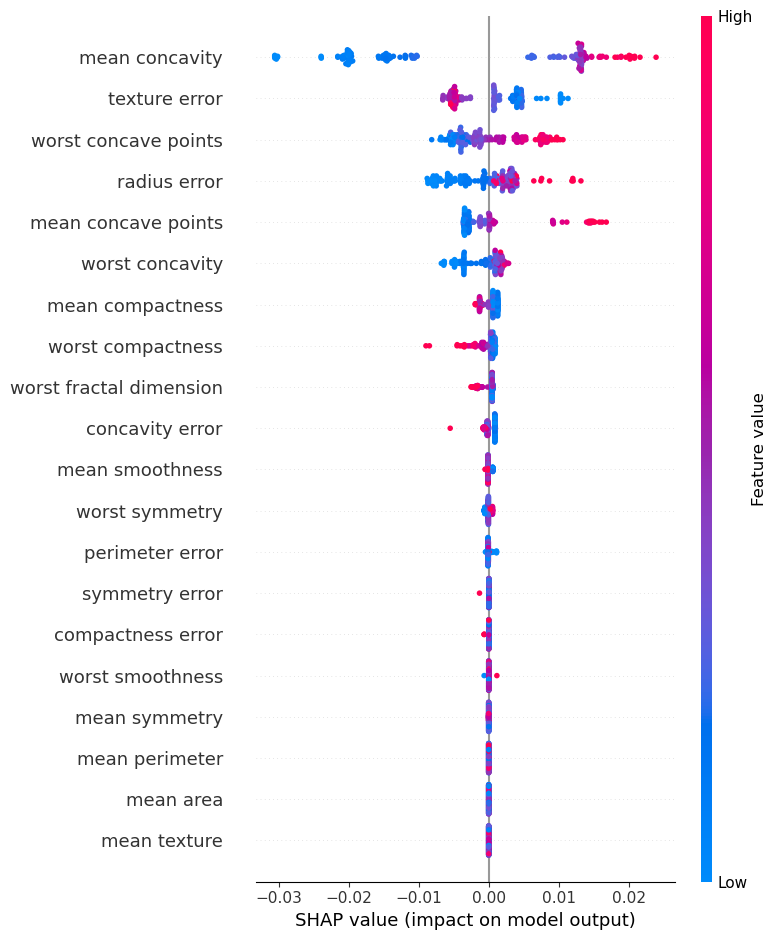

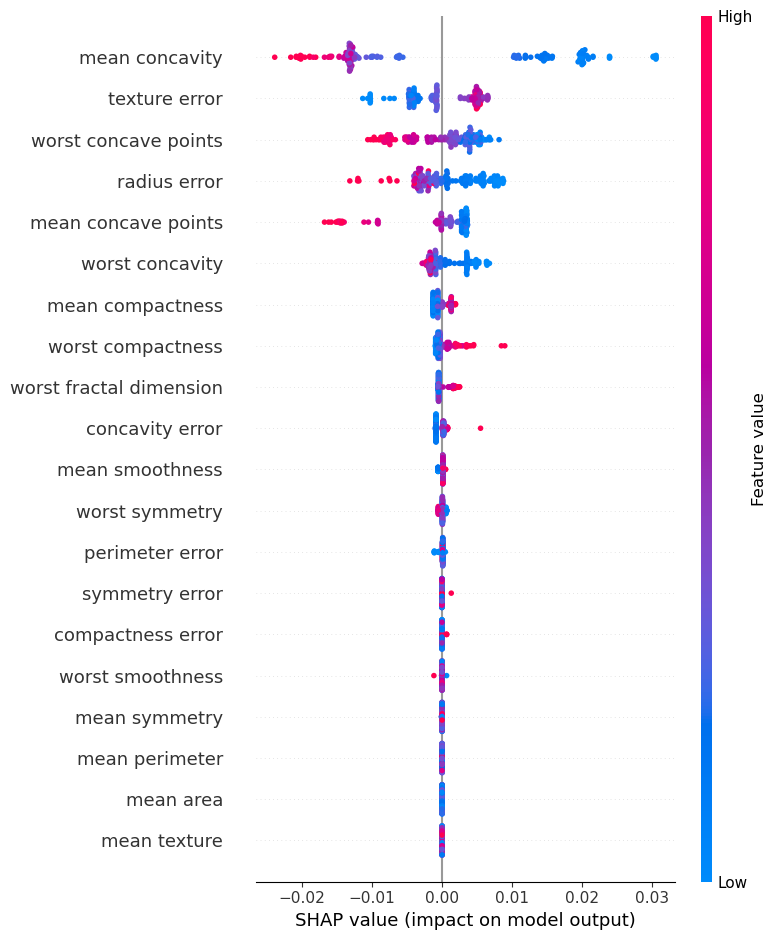

In [53]:
# 1. Create explainer with your trained model
explainer = shap.Explainer(rf_bal, X_train)   # use training features here

# 2. Generate SHAP values for the dataset you want to explain
shap_values = explainer(X_test)              # returns Explanation object

# 3. Plot summary (binary classification or regression)
# shap_values has shape (n_samples, n_features, n_classes)
print(shap_values.shape)

# Plot for class 0
shap.summary_plot(shap_values[:, :, 0])

# Plot for class 1
shap.summary_plot(shap_values[:, :, 1])

In [54]:
import lime
from lime.lime_tabular import LimeTabularExplainer

In [55]:
explainer = LimeTabularExplainer(training_data=X.values, 
                                 feature_names=X.columns.tolist(),
                                 mode='classification')

In [56]:
exp = explainer.explain_instance(data_row=X.values[3], predict_fn=rf_bal.predict_proba)
exp.show_in_notebook(show_table=True)

In [57]:
shap_explainer = shap.Explainer(rf_bal, X)

In [58]:
shap_values = shap_explainer.shap_values(X)

 98%|===================| 1115/1138 [00:31<00:00]        

In [59]:
shap_values.shape, X.shape

((569, 30, 2), (569, 30))

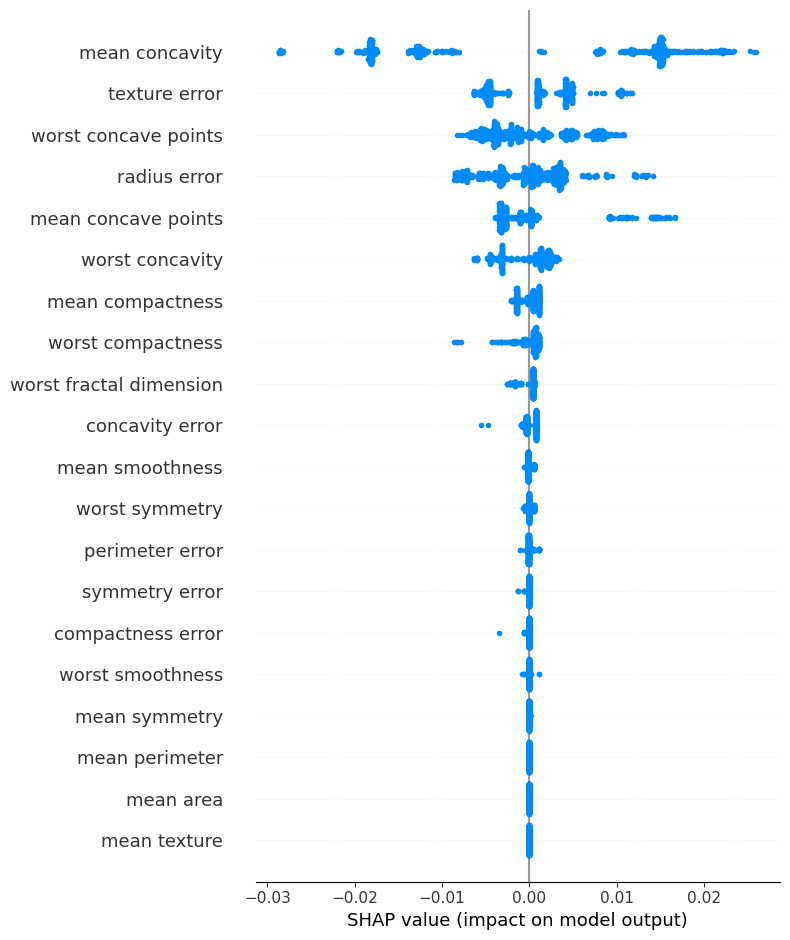

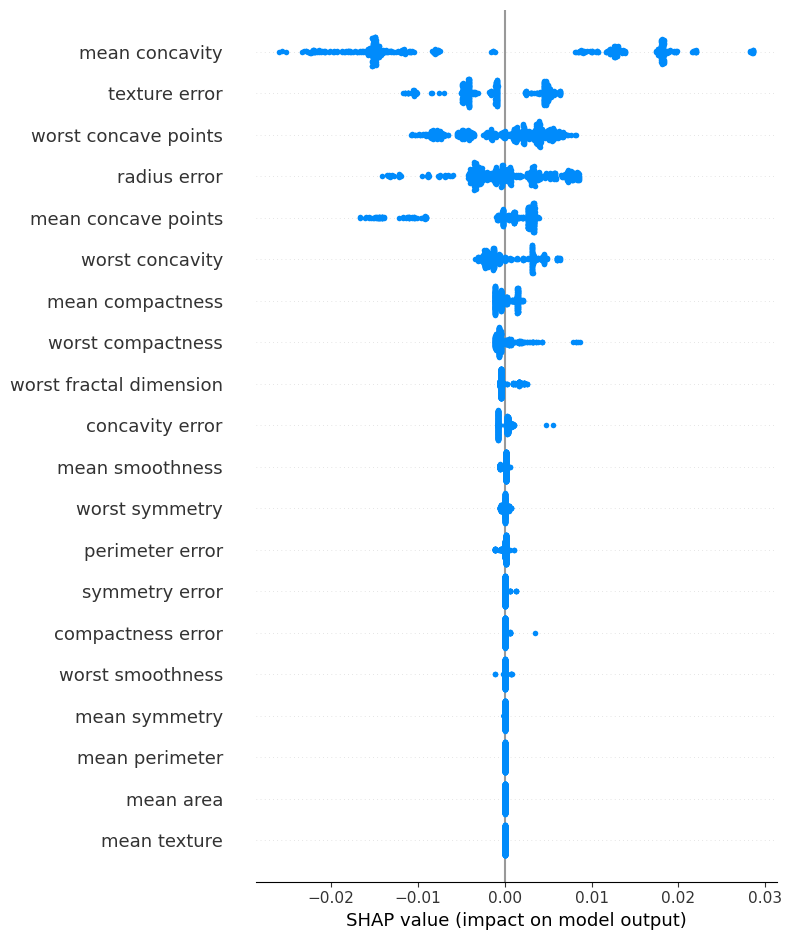

In [60]:
shap.summary_plot(shap_values[:, :, 0], X.columns.tolist())
shap.summary_plot(shap_values[:, :, 1], X.columns.tolist())

In [61]:
exp = shap_explainer(X)
shap.initjs()
shap.force_plot(base_value=shap_explainer.expected_value[0], shap_values=shap_values[:, :, 0], 
                feature_names=X.columns.tolist())

 99%|===================| 1131/1138 [107:07<00:39]        